In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(shuttles)

In [3]:
str(shuttles)

'data.frame':	23 obs. of  2 variables:
 $ Temp   : int  53 57 58 63 66 67 67 67 68 69 ...
 $ Damaged: int  2 1 1 1 0 0 0 0 0 0 ...


In [4]:
shuttles

Temp,Damaged
53,2
57,1
58,1
63,1
66,0
67,0
67,0
67,0
68,0
69,0


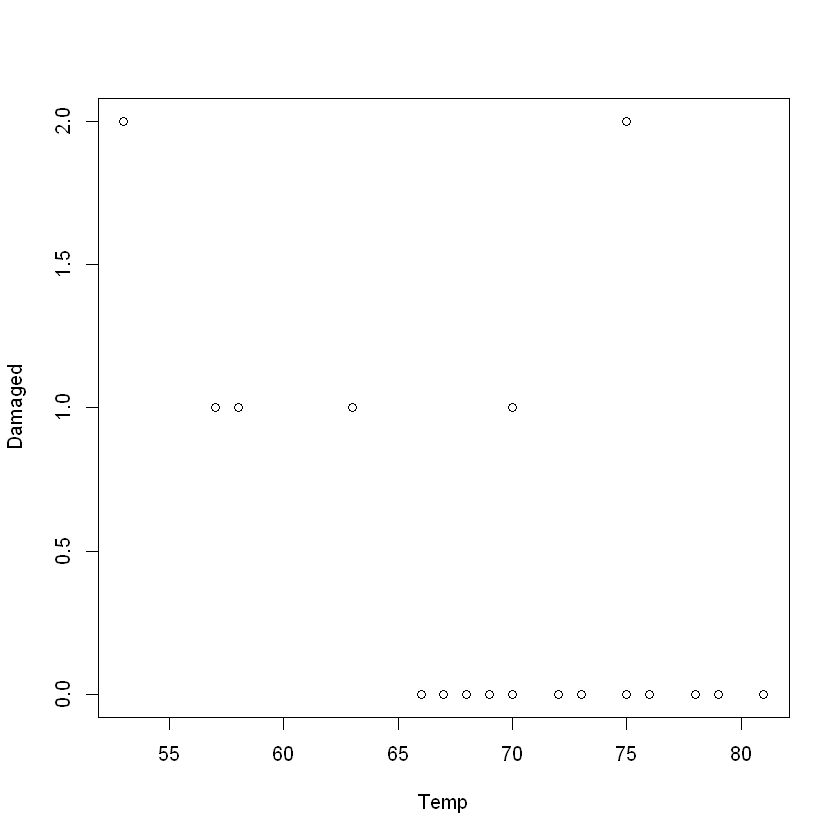

In [5]:
plot(Damaged ~ Temp, data=shuttles)

In [6]:
glm.1 <- glm(Damaged/6 ~ Temp, data=shuttles, family=binomial(link="logit"))

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"

In [8]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),5.0849772,7.4770289,0.6800799,0.4964539
Temp,-0.1156012,0.1151844,-1.0036185,0.3155625


In [9]:
anova(glm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,22,4.038394,NA
Temp,1,1.024006,21,3.014388,0.3115707


In [10]:
glm.0 <- glm(Damaged/6 ~ 1, data=shuttles, family=binomial(link="logit"))
glm.scoretest(glm.0, shuttles$Temp)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"

[1] -1.06221


	Shapiro-Wilk normality test

data:  qresid(glm.1)
W = 0.93118, p-value = 0.116


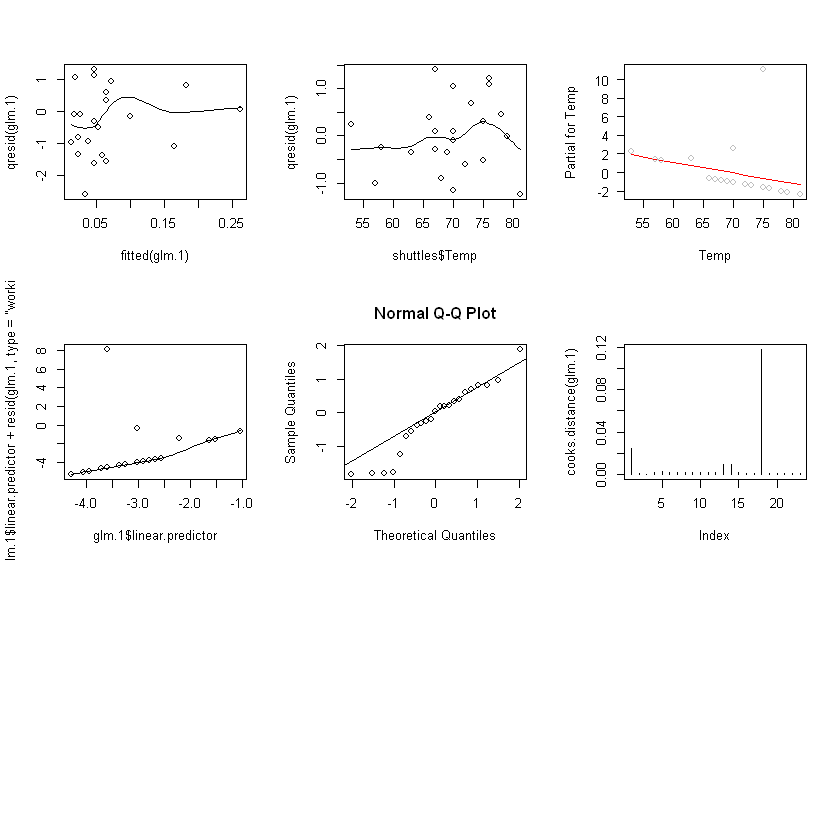

In [15]:
par(mfrow=c(3, 3))

scatter.smooth(qresid(glm.1) ~ fitted(glm.1))
scatter.smooth(qresid(glm.1) ~ shuttles$Temp)
termplot(glm.1, partial.resid = TRUE, las=1)
scatter.smooth(glm.1$linear.predictor + resid(glm.1, type="working") ~ glm.1$linear.predictor)
qqnorm(qresid(glm.1))
qqline(qresid(glm.1))
plot(cooks.distance(glm.1), type="h")
shapiro.test(qresid(glm.1))

In [22]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_ dfb.Temp    dffit    cov.r   cook.d      hat 
       0        0        1        4        0        1

In [23]:
rowSums(influence.measures(glm.1)$is.inf)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
 2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0

In [25]:
predict(glm.1, newdata=data.frame(Temp=31), type="response")*6

1 
4.906646

In [26]:
dose.p(glm.1)

             Dose       SE
p = 0.5: 43.98725 21.75392